In [133]:
# https://towardsdatascience.com/intro-to-scikit-learns-k-nearest-neighbors-classifier-and-regressor-4228d8d1cba6
import pandas as pd
# Load data
data = pd.read_csv('Volumetric_features.csv')
data.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [134]:
# https://towardsdatascience.com/intro-to-scikit-learns-k-nearest-neighbors-classifier-and-regressor-4228d8d1cba6
# Splitting the dataset into test and train datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
import numpy as np
properties = list(data.columns.values)
properties.remove('Age') # remove the outcome
# print(properties)
X = data[properties]
y = data['Age'] # y vector is the Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [135]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # arrange data into standard normal distribution (mean = 0, unit variance) -- improves accuracy
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Text(0, 0.5, 'Root Mean Square Error')

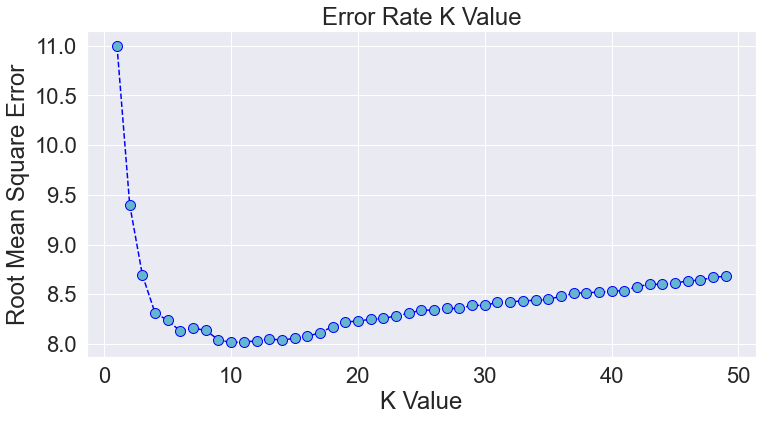

In [136]:
# Comparing Root Mean Square Error of KNN model with varying numbers of neighbors i
# https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

RMSE=[]
# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test) # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))
    pred_i = knn.predict(X_test)
    RMSE.append(error)
    
plt.figure(figsize=((12,6)))
plt.plot(range(1,50), RMSE, color='blue', linestyle='dashed', marker='o', markerfacecolor='c', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Root Mean Square Error') 

In [137]:
# Based on the plot above, the K value with the lowest RMSE value is the most optimal KNN
# Therefore, the most optimal K = 10
from sklearn.neighbors import KNeighborsRegressor
# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=10)
# Fit and score
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.840039874815401

In [138]:
# Outputs
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

trainR2 = r2_score(y_train, y_pred_train)
testR2 = r2_score(y_test, y_pred_test)

print("KNN Performance on Training Model (R^2): ", trainR2)
print("KNN Performance on Testing Model (R^2): ", testR2)

# Print RMSE (Accuracy for regression)
Train_RMSE = math.sqrt(mean_squared_error(y_train, y_pred_train))
Test_RMSE = math.sqrt(mean_squared_error(y_test, y_pred_test))

print("Training RMSE: ", Train_RMSE)
print("Testing RMSE: ", Test_RMSE)
# print("MLR Predicted Y training: ", mlrTrain_predictY)
# print("MLR Predicted Y testing: ", mlrTest_predictY)

KNN Performance on Training Model (R^2):  0.8669287743850189
KNN Performance on Testing Model (R^2):  0.840039874815401
Training RMSE:  7.319800697322347
Testing RMSE:  8.01708282489813


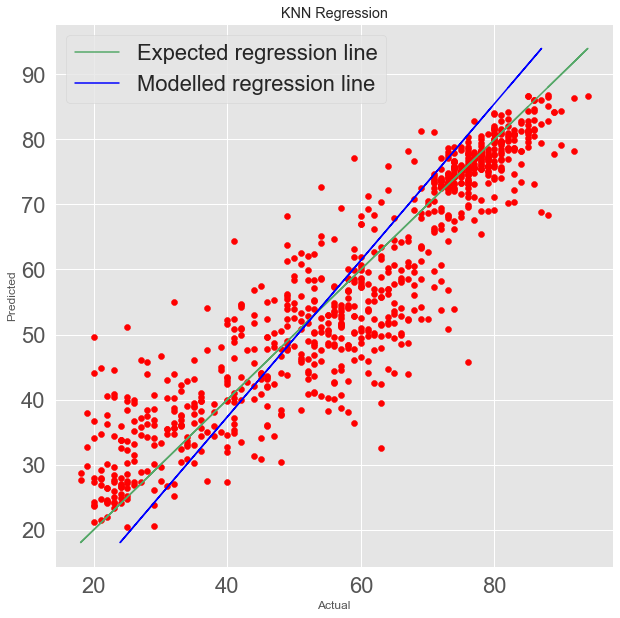

In [107]:
# Regression plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred_test, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test,y_pred_test, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Modelled regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()
    plt.title("KNN Regression")

C:\Users\lubab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lubab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'KNN Regression'}, xlabel='Age'>

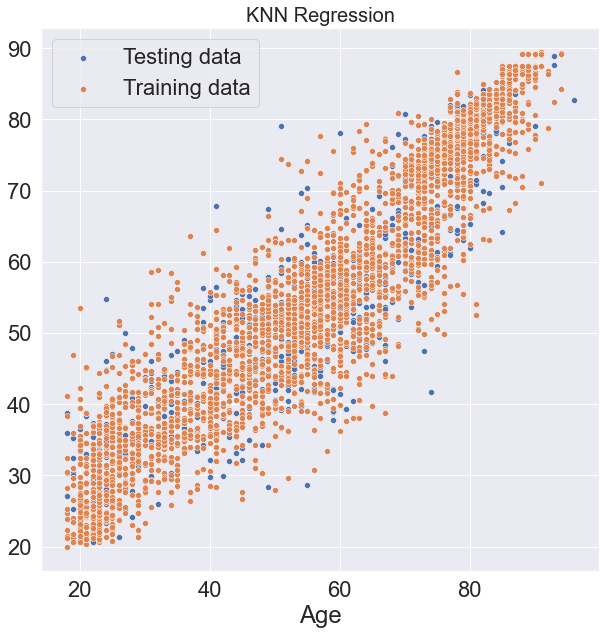

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.title("KNN Regression", fontsize=20)
sns.set(font_scale = 2)
sns.scatterplot(y_test, y_pred_test, label="Testing data")
sns.scatterplot(y_train, y_pred_train, label="Training data")